In [48]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
# Set main model directory to parent directory
model_dir = os.path.dirname(os.getcwd()) 

In [50]:
# Read Model Scenario Results
scen = h5py.File(model_dir + r'/outputs/daysim_outputs.h5','r+')
scen_name = 'Model: 2040'

In [51]:
# Read Base Data
base_file = r'/inputs/hh_and_persons.h5'

base = h5py.File(model_dir + base_file ,'r+')
base_name = '2006 Survey'

In [ ]:
####################
# Age Distribution
####################

In [52]:
# Summarize Person-level results

# Age distribution
ages_scen = np.asarray(scen['Person']['pagey'])
ages_base = np.asarray(base['Person']['pagey'])

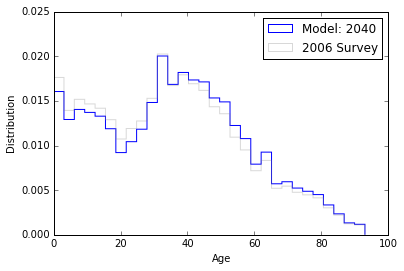

In [53]:
# Age Distribution Histogram
bins = 30

# Set model results to boldest (alpha default to 1)
P.hist(ages_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)

# Compare with survey estimates (alpha < 0.5); Currently using fake data...
P.hist(ages_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlabel('Age')
P.ylabel('Distribution')
P.legend()

In [54]:
print "Gender split (1 = female)"
print ""
print "Model results: " + str((np.asarray(scen['Person']['pgend']).mean()-1).round(3))
print base_name + " results: " + str((np.asarray(base['Person']['pgend']).mean()-1).round(3))

Gender split (1 = female)

Model results: 0.504
2006 Survey results: 0.508


In [ ]:
####################
# Worker Type
####################

In [144]:
# Worker type
worker_type_var = 'pptyp'    # Assuming this is same as base as in scenario

worker_type_scen = np.asarray(scen['Person'][worker_type_var])
worker_type_base = np.asarray(base['Person'][worker_type_var])

worker_labels = {
  1: "Full time worker",
  2: "Part time worker",
  3: "Non working adult age 65+",
  4: "Non working adult age<65",
  5: "University student",
  6: "High school student age 16+",
  7: "Child age 5-15",
  8: "Child age 0-4"
}

In [136]:
# Sum by worker type for scenario results
df = pd.DataFrame(worker_type_scen, columns=[worker_type_var])
df['Worker Type'] = [worker_labels[x] for x in df[worker_type_var].as_matrix()]
worker_types_scen = df.groupby('Worker Type').count()['pptyp']     # Sum by category
worker_types_scen = worker_types_scen/worker_types_scen.sum()     # Convert totals to shares

In [137]:
# Sum by worker type for base
df = pd.DataFrame(worker_type_base, columns=[worker_type_var])
df['Worker Type'] = [worker_labels[x] for x in df[worker_type_var].as_matrix()]
worker_types_base = df.groupby('Worker Type').count()['pptyp']    # Sum by category
worker_types_base = worker_types_base/worker_types_base.sum()     # Convert totals to shares

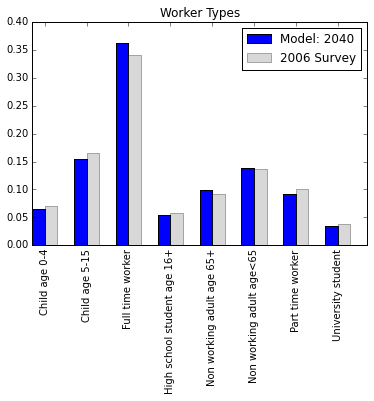

In [174]:
# Set bar chart params
ind = np.arange(len(worker_types_scen))    # index array to match dataset size
width = 0.3    # width of bars

fig, ax = P.subplots()    # Initialize bar chart object

workers_scen = ax.bar(ind, worker_types_scen.values, width=width, color='b')    # plot scenario data
workers_base = ax.bar(ind+width, worker_types_base.values, width=width, color='grey', alpha=0.3)    # plot base data (note the index offset by the bar width)
ax.set_xticks(ind+width)   
ax.set_xticklabels(worker_types_scen.index, rotation=90)
ax.set_title('Worker Types')

ax.legend((workers_scen, workers_base), (scen_name, base_name))

In [ ]:
####################
# Student Status
####################

In [164]:
student_type_var = 'pstyp'    # Assuming this is same as base as in scenario

student_type_scen = np.asarray(scen['Person'][student_type_var])
student_type_base = np.asarray(base['Person'][student_type_var])

student_labels = {
  0: "Not a student",
  1: "Full-time student",
  2: "Part-time student",
}

In [165]:
# Sum by student type for scenario results
df = pd.DataFrame(student_type_scen, columns=[student_type_var])
df['Student Status'] = [student_labels[x] for x in df[student_type_var].as_matrix()]
student_type_scen = df.groupby('Student Status').count()[student_type_var]     # Sum by category
student_type_scen = student_type_scen/student_type_scen.sum()     # Convert totals to shares

In [166]:
# Sum by student type for base
df = pd.DataFrame(student_type_base, columns=[student_type_var])
df['Student Status'] = [student_labels[x] for x in df[student_type_var].as_matrix()]
student_type_base = df.groupby('Student Status').count()[student_type_var]    # Sum by category
student_type_base = student_type_base/student_type_base.sum()     # Convert totals to shares

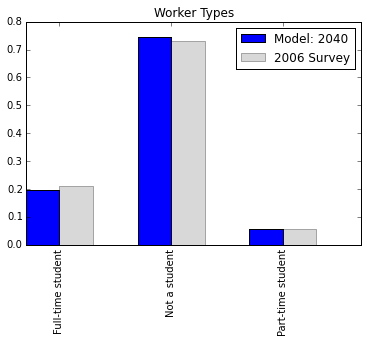

In [176]:
# Set bar chart params
ind = np.arange(len(student_type_scen))    # index array to match dataset size
width = 0.3    # width of bars

fig, ax = P.subplots()    # Initialize bar chart object

students_scen = ax.bar(ind, student_type_scen.values, width=width, color='b')    # plot scenario data
students_base = ax.bar(ind+width, student_type_base.values, width=width, color='grey', alpha=0.3)    # plot base data (note the index offset by the bar width)
ax.set_xticks(ind+width)   
ax.set_xticklabels(student_type_scen.index, rotation=90)
ax.set_title('Worker Types')

ax.legend((students_scen, students_base), (scen_name, base_name))